### **Clase 2 - Probabilidades**

#### **`Importar Librerias`**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lec2_graphs as grx
import scipy.stats as stats

plt.style.use('seaborn-whitegrid') # Graficos estilo Seaborn
plt.rcParams["figure.figsize"] = (4,6) # Tamaño graficos
plt.rcParams["figure.dpi"] = 100 # Resolucion graficos

#### **`Listar archivos que se encuentran en el mismo directorio que el actual archivo notebook`**

In [3]:
import os

os.listdir()

['battles.csv',
 'calidad_datos.py',
 'Clase 2 - Probabilidad y funciones.pdf',
 'clase_2_-_probabilidades.ipynb',
 'clase_3_-_Uso_de_los_metodos_loc()_y_iloc().ipynb',
 'lec2_graphs.py',
 'worldcup2014.csv',
 '__pycache__']

#### **`Importar un archivo CSV en un Dataframe`**

In [4]:
df = pd.read_csv('battles.csv')

Dimension del Dataframe

In [4]:
df.shape

(38, 25)

#### **`Importar el modulo de`** **calidad_datos** **`para analizar datos estadisticos, nulos y ceros del Dataframe`**

In [13]:
from calidad_datos import calidad_datos

d = calidad_datos(df)
d = np.round(d, 2)

In [14]:
d

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,limit_inf,limit_sup,outliers
year,int64,0,0.00,0,0.00,38.0,NaN,NaN,NaN,299.105263,0.68928,298.0,299.0,299.0,300.0,300.0,298.071343,300.139183,7
battle_number,int64,0,0.00,0,0.00,38.0,NaN,NaN,NaN,19.5,11.113055,1.0,10.25,19.5,28.75,38.0,2.830417,36.169583,4
defender_4,float64,38,1.00,0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
summer,float64,1,0.03,11,0.29,37.0,NaN,NaN,NaN,0.702703,0.463373,0.0,0.0,1.0,1.0,1.0,0.007643,1.397762,11
defender_size,float64,19,0.50,0,0.00,19.0,NaN,NaN,NaN,6428.157895,6225.182106,100.0,1070.0,6000.0,10000.0,20000.0,-2909.615264,15765.931054,2
attacker_size,float64,14,0.37,0,0.00,24.0,NaN,NaN,NaN,9942.541667,20283.092065,20.0,1375.0,4000.0,8250.0,100000.0,-20482.096432,40367.179765,1
major_capture,float64,1,0.03,26,0.68,37.0,NaN,NaN,NaN,0.297297,0.463373,0.0,0.0,0.0,1.0,1.0,-0.397762,0.992357,11
major_death,float64,1,0.03,24,0.63,37.0,NaN,NaN,NaN,0.351351,0.483978,0.0,0.0,0.0,1.0,1.0,-0.374615,1.077318,0
defender_3,float64,38,1.00,0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
location,object,1,0.03,0,0.00,37,27,Riverrun,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### **`Análisis de los datos`**

In [15]:
df.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [16]:
df.columns.values

array(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4',
       'defender_1', 'defender_2', 'defender_3', 'defender_4',
       'attacker_outcome', 'battle_type', 'major_death', 'major_capture',
       'attacker_size', 'defender_size', 'attacker_commander',
       'defender_commander', 'summer', 'location', 'region', 'note'],
      dtype=object)

In [22]:
df.shape

(38, 25)

In [21]:
len(df)

38

In [17]:
df.isna().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

In [19]:
df['attacker_king'].value_counts(dropna=False)

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
NaN                          2
Name: attacker_king, dtype: int64

In [20]:
df['attacker_king'].value_counts(dropna=False) / len(df)

Joffrey/Tommen Baratheon    0.368421
Robb Stark                  0.263158
Balon/Euron Greyjoy         0.184211
Stannis Baratheon           0.131579
NaN                         0.052632
Name: attacker_king, dtype: float64

In [23]:
# Forma 1
# Calcula el total de c/u con respecto al total (NO contabiliza los NaN de la columna). Es decir: 
# Joffrey/Tommen Baratheon  :  14/36 = 0,388889
df['attacker_king'].value_counts(normalize=True)

Joffrey/Tommen Baratheon    0.388889
Robb Stark                  0.277778
Balon/Euron Greyjoy         0.194444
Stannis Baratheon           0.138889
Name: attacker_king, dtype: float64

In [24]:
# Forma 2
df['attacker_king'].value_counts('%')

Joffrey/Tommen Baratheon    0.388889
Robb Stark                  0.277778
Balon/Euron Greyjoy         0.194444
Stannis Baratheon           0.138889
Name: attacker_king, dtype: float64

Para efectos del ejemplo, vamos a reemplazar todos los NaN por un 0

In [27]:
# Reemplazo TODOS LOS VALORES NaN con un 0
# Con el parametro 'inplace' se mantiene la modificacion recien realizada en el mismo Dataframe
df.fillna(0, inplace=True)

In [28]:
df['attacker_king'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
0                            2
Name: attacker_king, dtype: int64

In [29]:
# df['attacker_king'].value_counts('%')
df['attacker_king'].value_counts(normalize=True)

Joffrey/Tommen Baratheon    0.368421
Robb Stark                  0.263158
Balon/Euron Greyjoy         0.184211
Stannis Baratheon           0.131579
0                           0.052632
Name: attacker_king, dtype: float64

In [30]:
df['attacker_king'].value_counts(dropna=False) / len(df)

Joffrey/Tommen Baratheon    0.368421
Robb Stark                  0.263158
Balon/Euron Greyjoy         0.184211
Stannis Baratheon           0.131579
0                           0.052632
Name: attacker_king, dtype: float64

#### **`Union de probabilidades`**

<center><img src="https://i.postimg.cc/ydStR1Vm/dl8.png"></center>

In [36]:
# Forma 1
counter = 0
for rowname, rowserie in df.iterrows():
    if rowserie['major_death'] == 1.0 or rowserie['major_capture'] == 1.0:
        counter += 1
print(counter)          

18


In [37]:
# Forma 2
condicion = (df['major_death'] == 1) | (df['major_capture'] == 1)

condicion.value_counts()

False    20
True     18
dtype: int64

In [39]:
condicion = (df['major_death'] == 1) | (df['major_capture'] == 1)

condicion.value_counts(normalize=True)

False    0.526316
True     0.473684
dtype: float64

In [40]:
prob_union = condicion.value_counts(normalize=True)[1]
prob_union

0.47368421052631576

**`Comprobacion formula`**

**`P(A)`**

In [ ]:
# df['major_death'].mean()                                ====>  0.34210526315789475
# df['major_death'].value_counts().get(1) / len(df)       ====>   13/38    ====>  0.34210526315789475
df['major_death'].value_counts(normalize=True).get(1)   # ====>  0.34210526315789475

0.34210526315789475

**`P(B)`**

In [84]:
# df['major_capture'].mean()                                ====>  0.2894736842105263
# df['major_capture'].value_counts().get(1) / len(df)       ====>   11/38    ====>  0.2894736842105263
df['major_capture'].value_counts(normalize=True).get(1)   # ====>  0.2894736842105263

0.2894736842105263

**`P(A ⋂ B)`**

In [85]:
condicion = (df['major_death'] == 1) & (df['major_capture'] == 1)
prob_intersect = condicion.value_counts(normalize=True)[1]
prob_intersect

0.15789473684210525

In [53]:
#                                   P(A)                        P(B)               P(A ⋂ B)
comprobacion_prob_union = df['major_death'].mean() + df['major_capture'].mean() - prob_intersect
comprobacion_prob_union

0.47368421052631576

#### **`Intersección de probabilidades`**

<center><img src="https://i.postimg.cc/3JWpFkMQ/dl9.png"></center>

In [41]:
# Forma 1
counter = 0
for rowname, rowserie in df.iterrows():
    if rowserie['major_death'] == 1.0 and rowserie['major_capture'] == 1.0:
        counter += 1
print(counter)          

6


In [42]:
# Forma 2
condicion = (df['major_death'] == 1) & (df['major_capture'] == 1)

condicion.value_counts()

False    32
True      6
dtype: int64

In [43]:
condicion = (df['major_death'] == 1) & (df['major_capture'] == 1)

condicion.value_counts(normalize=True)

False    0.842105
True     0.157895
dtype: float64

In [47]:
prob_interseccion = condicion.value_counts(normalize=True)[1]
prob_interseccion

0.15789473684210525

#### **`Probabilidad conjunta`**

<center><img src="https://i.postimg.cc/VN5qgw75/dl10.png"></center>

**`Muertes importantes en batallas Baratheon`**
- ¿Cual es la probabilidad que ocurra una muerte importante dado que está ocurrió en una Batalla Baratheon?

- **`Evento A`**: Probabilidad de muerte importante en una batalla cualquiera (14)
- **`Evento B`**: Probabilidad de una batalla originada por un Baratheon (13)
- **`Evento A y B`**: Probabilidad de muerte importante en batalla Baratheon (5)

#### **`P(A ⋂ B)`**

In [95]:
# Forma 1
muerte_baratheon = 0
# Para cada fila en nuestra tabla
for i, r in df.iterrows():
    # Si la batalla la inicio un Baratheon y hubo una muerte importante
    if (r['attacker_king'] == 'Joffrey/Tommen Baratheon' and r['major_death'] == 1):
        # agregar 1 a nuestro contador
        muerte_baratheon += 1

muerte_baratheon

5

In [5]:
# Forma 2
condicion = (df['major_death'] == 1) & (df['attacker_king'] == 'Joffrey/Tommen Baratheon')

condicion.value_counts(normalize=True)

False    0.868421
True     0.131579
dtype: float64

#### **`P(B)`**

In [93]:
batallas_baratheon = df['attacker_king'].value_counts().get('Joffrey/Tommen Baratheon')
batallas_baratheon

14

**`Probabilidad que ocurra una muerte en una Batalla Baratheon`**

In [94]:
print('Pr(Muerte|Baratheon):', muerte_baratheon/batallas_baratheon)

Pr(Muerte|Baratheon): 0.35714285714285715


#### **Gráfico**

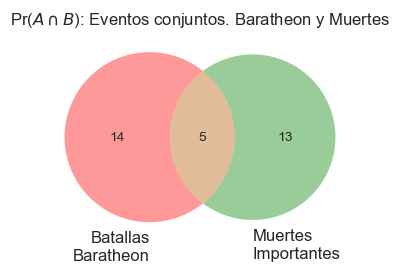

In [64]:
grx.graph_venn()